In [1]:
%load_ext autoreload
%autoreload 2

## Libraries

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from utils import *
from preprocessing import *
from visualization import *
from feature_selectors.categorical_feature_selectors import MutualInformationSelector
from feature_selectors.correlation_feature_selector import CorrelationFeatureSelector
from pathlib import Path

## Train data

In [3]:
root_dir = Path("data").resolve()
filename = 'train.csv'

In [4]:
df = read_data_from_csv(root_dir, filename).drop(columns=["Id"])
target = df["SalePrice"]

## Numerical Features Analysis

In [5]:
n_df = df[get_numeric_columns(df)]


In [6]:
n_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

## Impute the NaN Values of Numerical Features with the `mean` Value of the Feature Column

In [7]:
for col in columns_with_nans(n_df).index:
    n_df = feature_fill_nan_with_value(n_df, col, n_df[col].mean())

## Correlation Map of Numerical Features

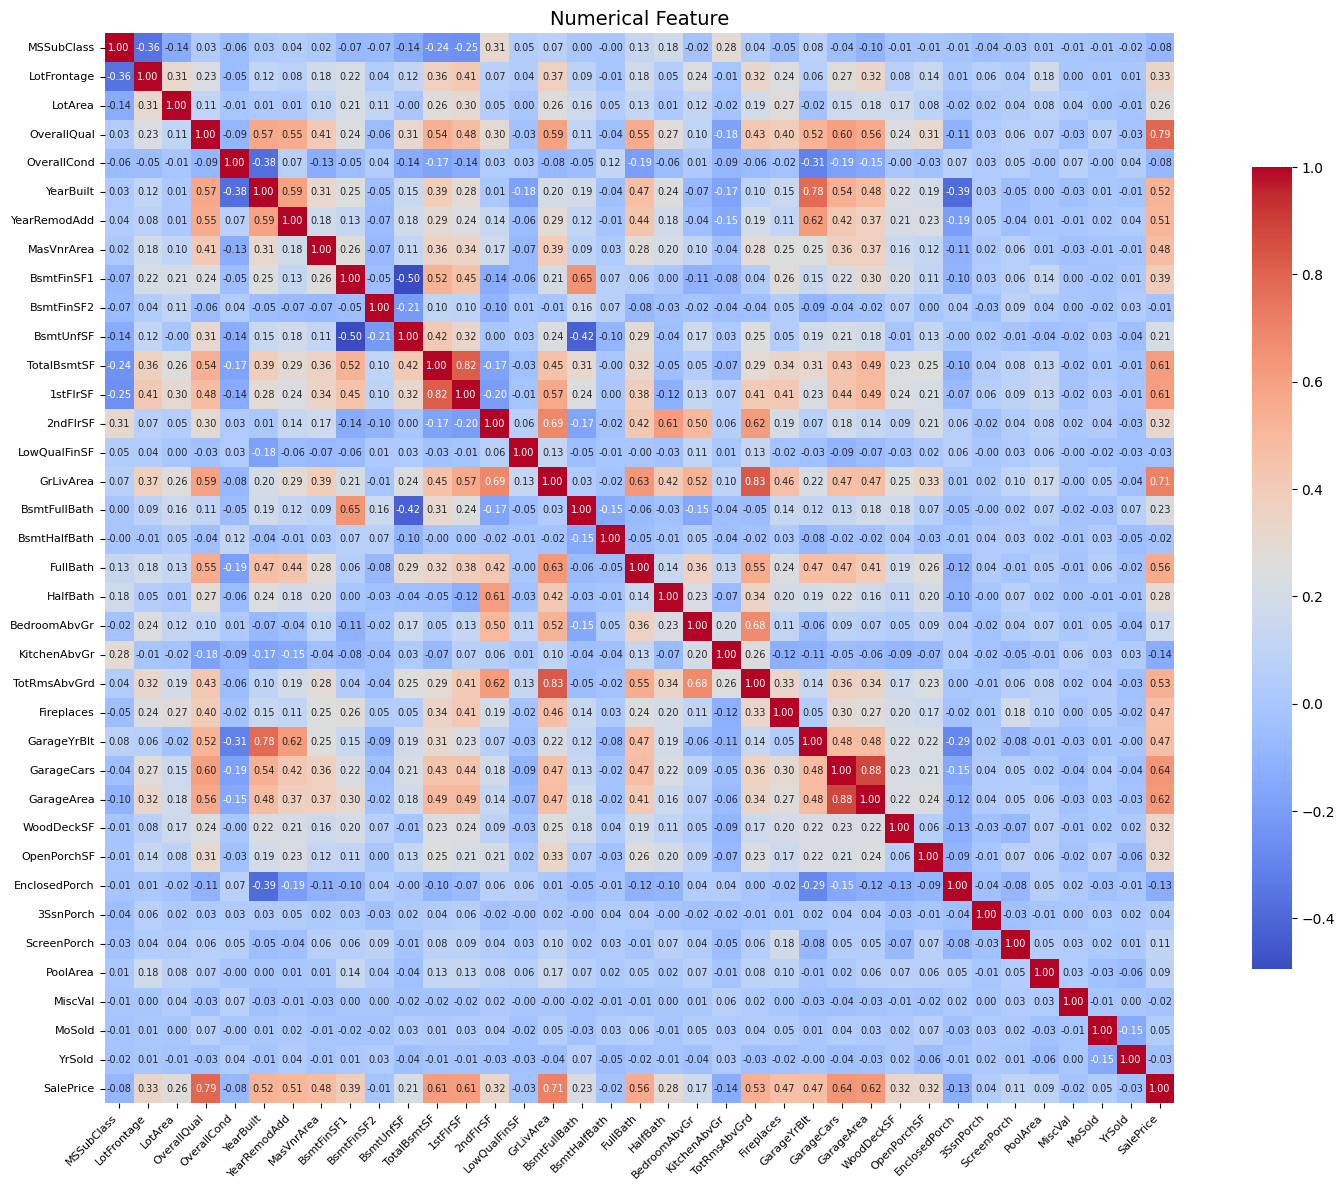

In [ ]:
correlation_heat_map(n_df, method='spearman', title="Numerical Feature")

## Scatter Plot for Numerical Features

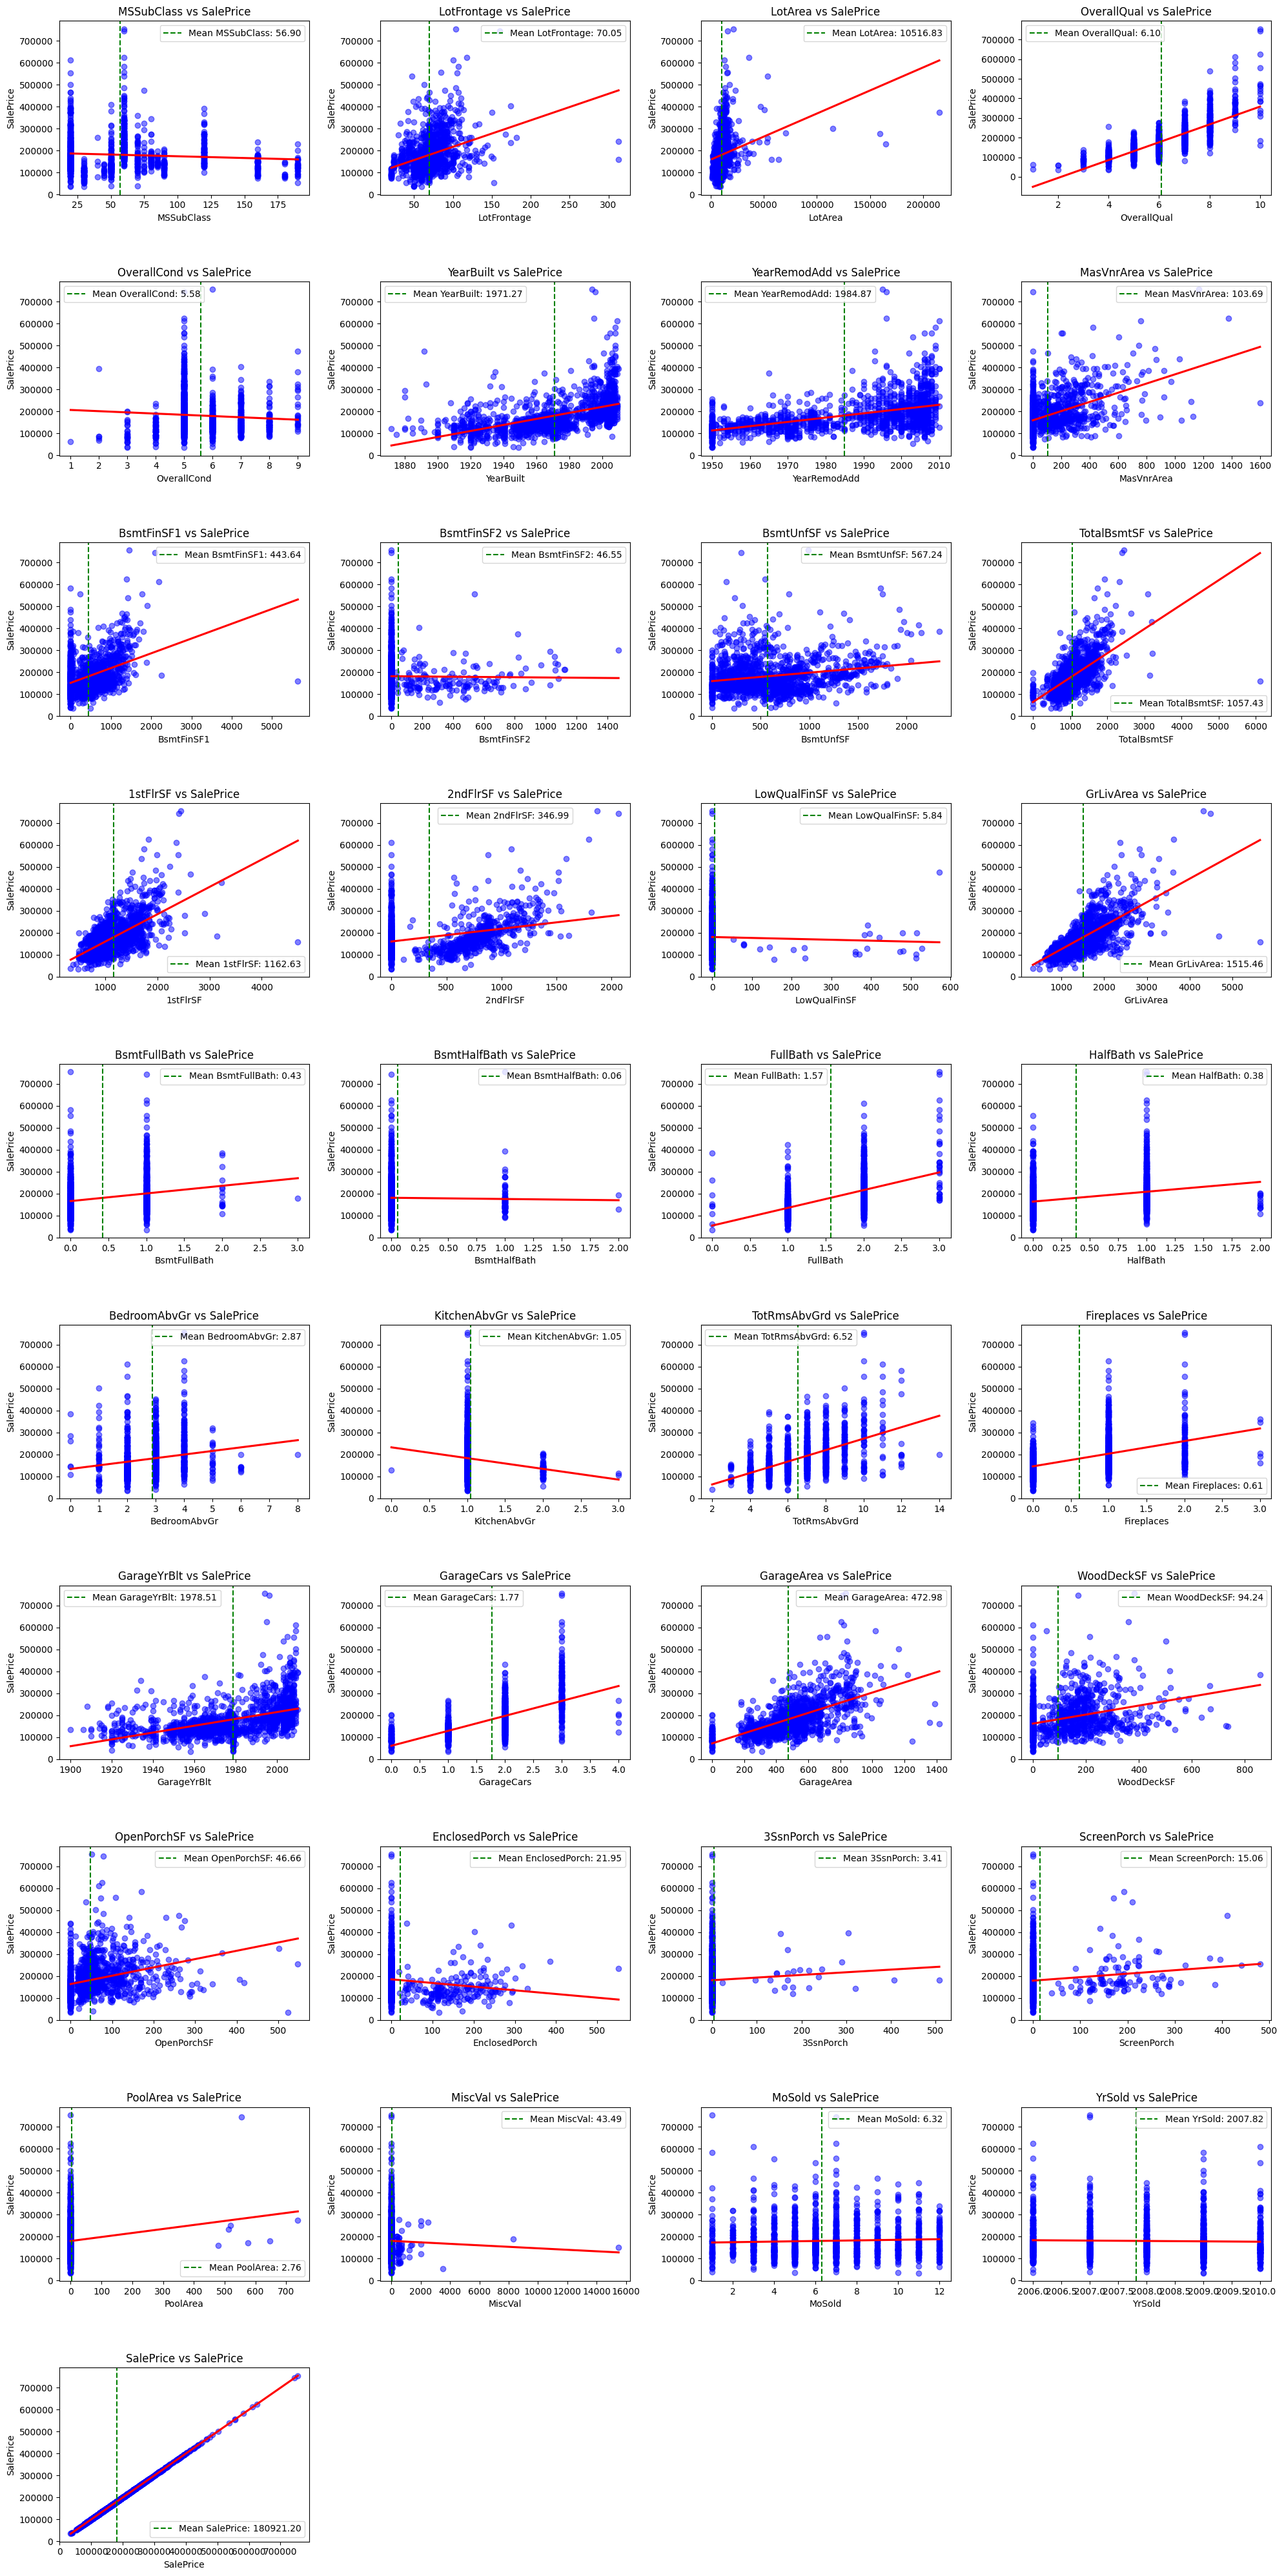

In [9]:
scatter_plots_against_target(n_df, target)

## Feature Selections of Numerical Features

In [9]:
n_df = CorrelationFeatureSelector(method='spearman', threshold=0.2).fit_transform(n_df, target)

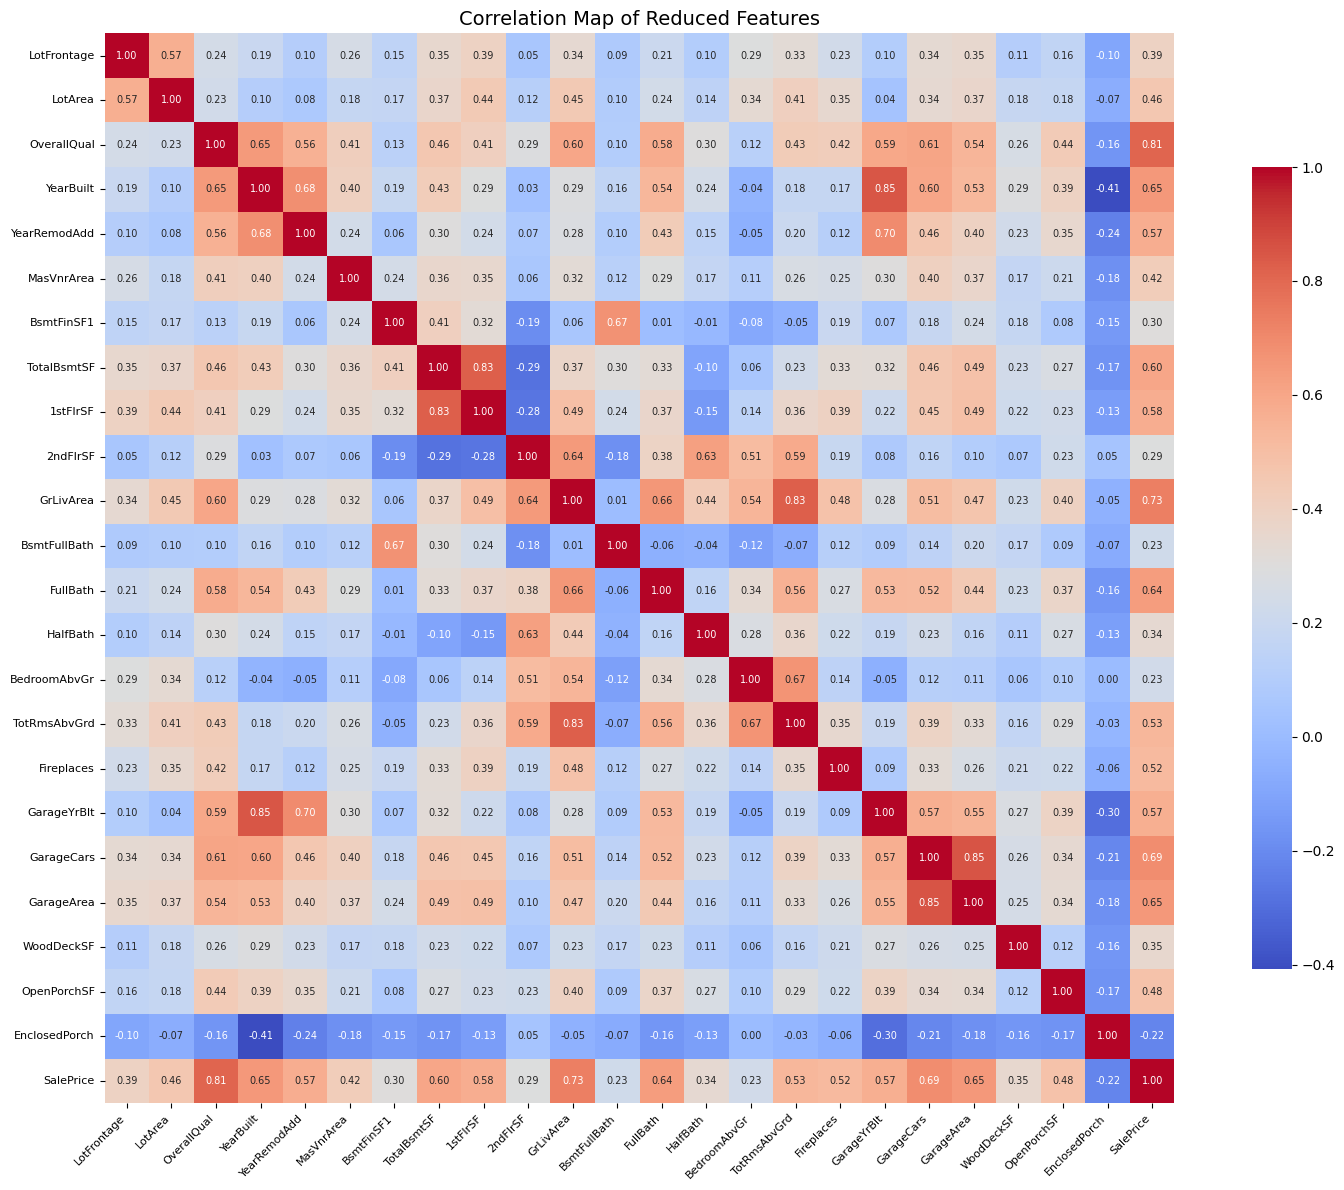

In [10]:
correlation_heat_map(n_df, method='spearman', title='Correlation Map of Reduced Features')

## Scatter plot of Reduced Features

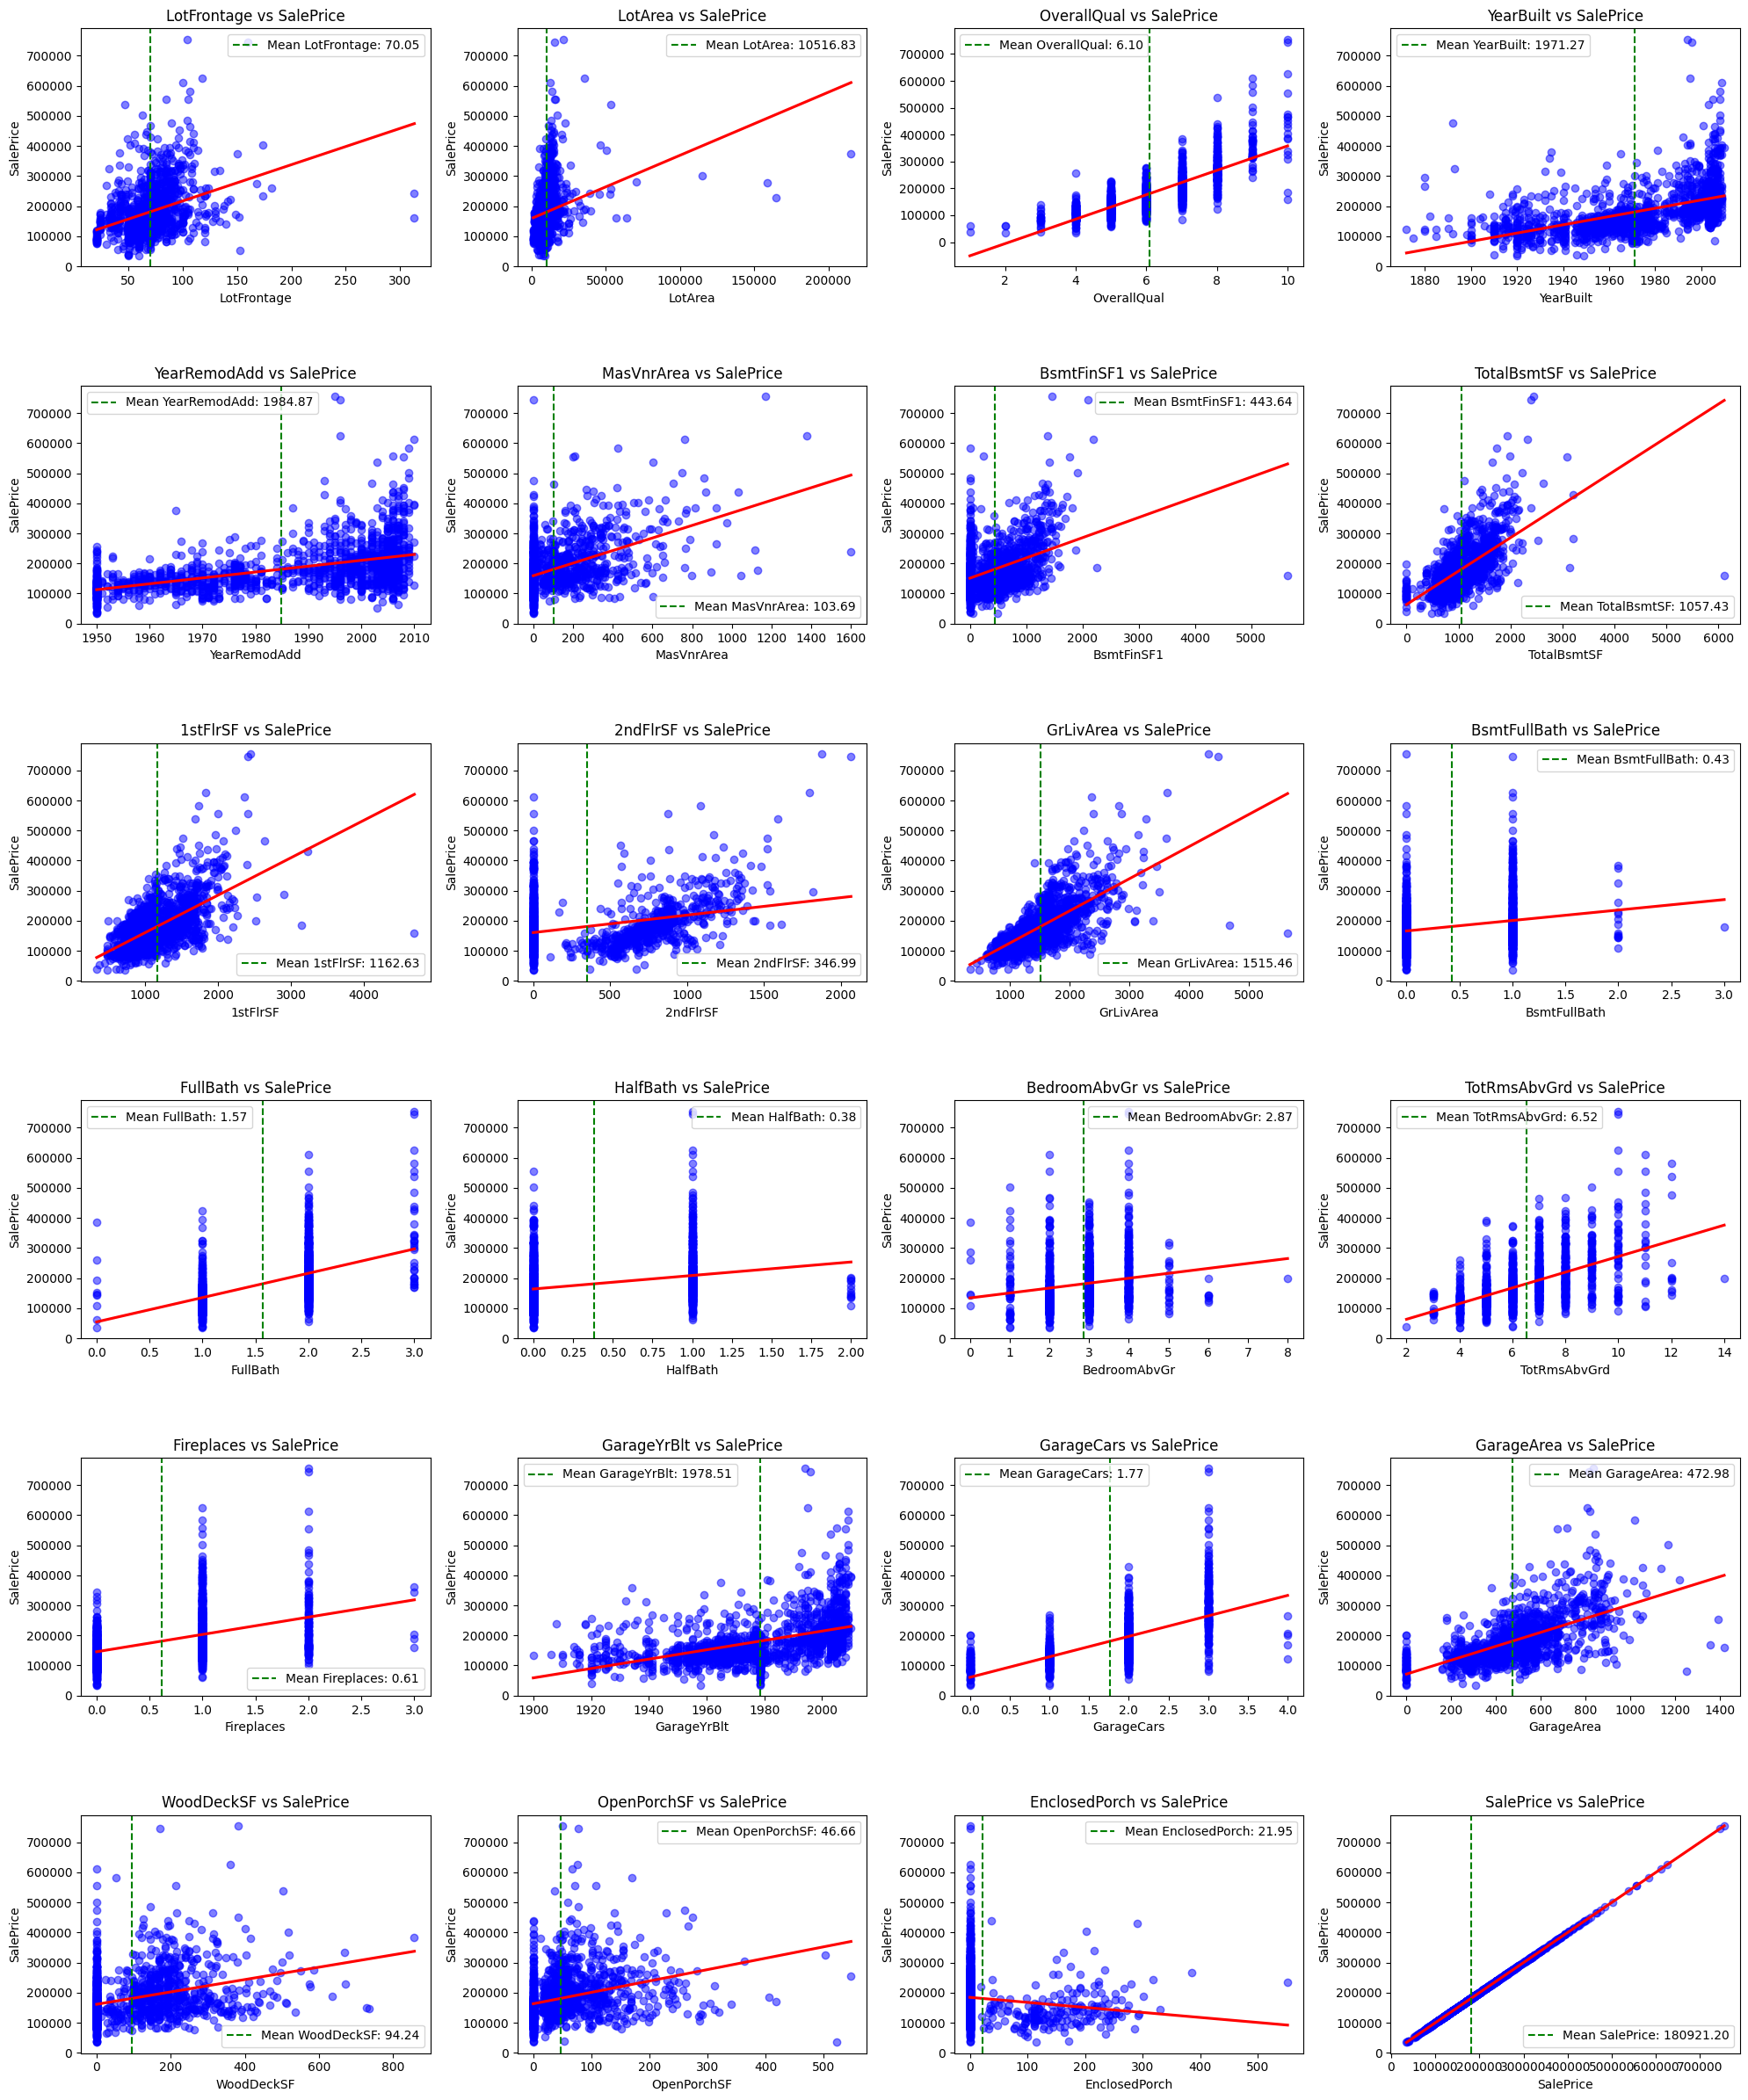

In [12]:
scatter_plots_against_target(n_df, target)

In [13]:
n_df = n_df.drop(columns='SalePrice')

## Analysis of Categorical Features

In [12]:
c_df = df[get_categorical_columns(df)]

In [13]:
c_df.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [14]:
columns_with_nans(c_df)

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Fill the missed values of NA values with 'NA' instead of 'NaN'

In [15]:
c_df = fill_nan(c_df, "NA")

## Boxplot of categorical Features VS Target

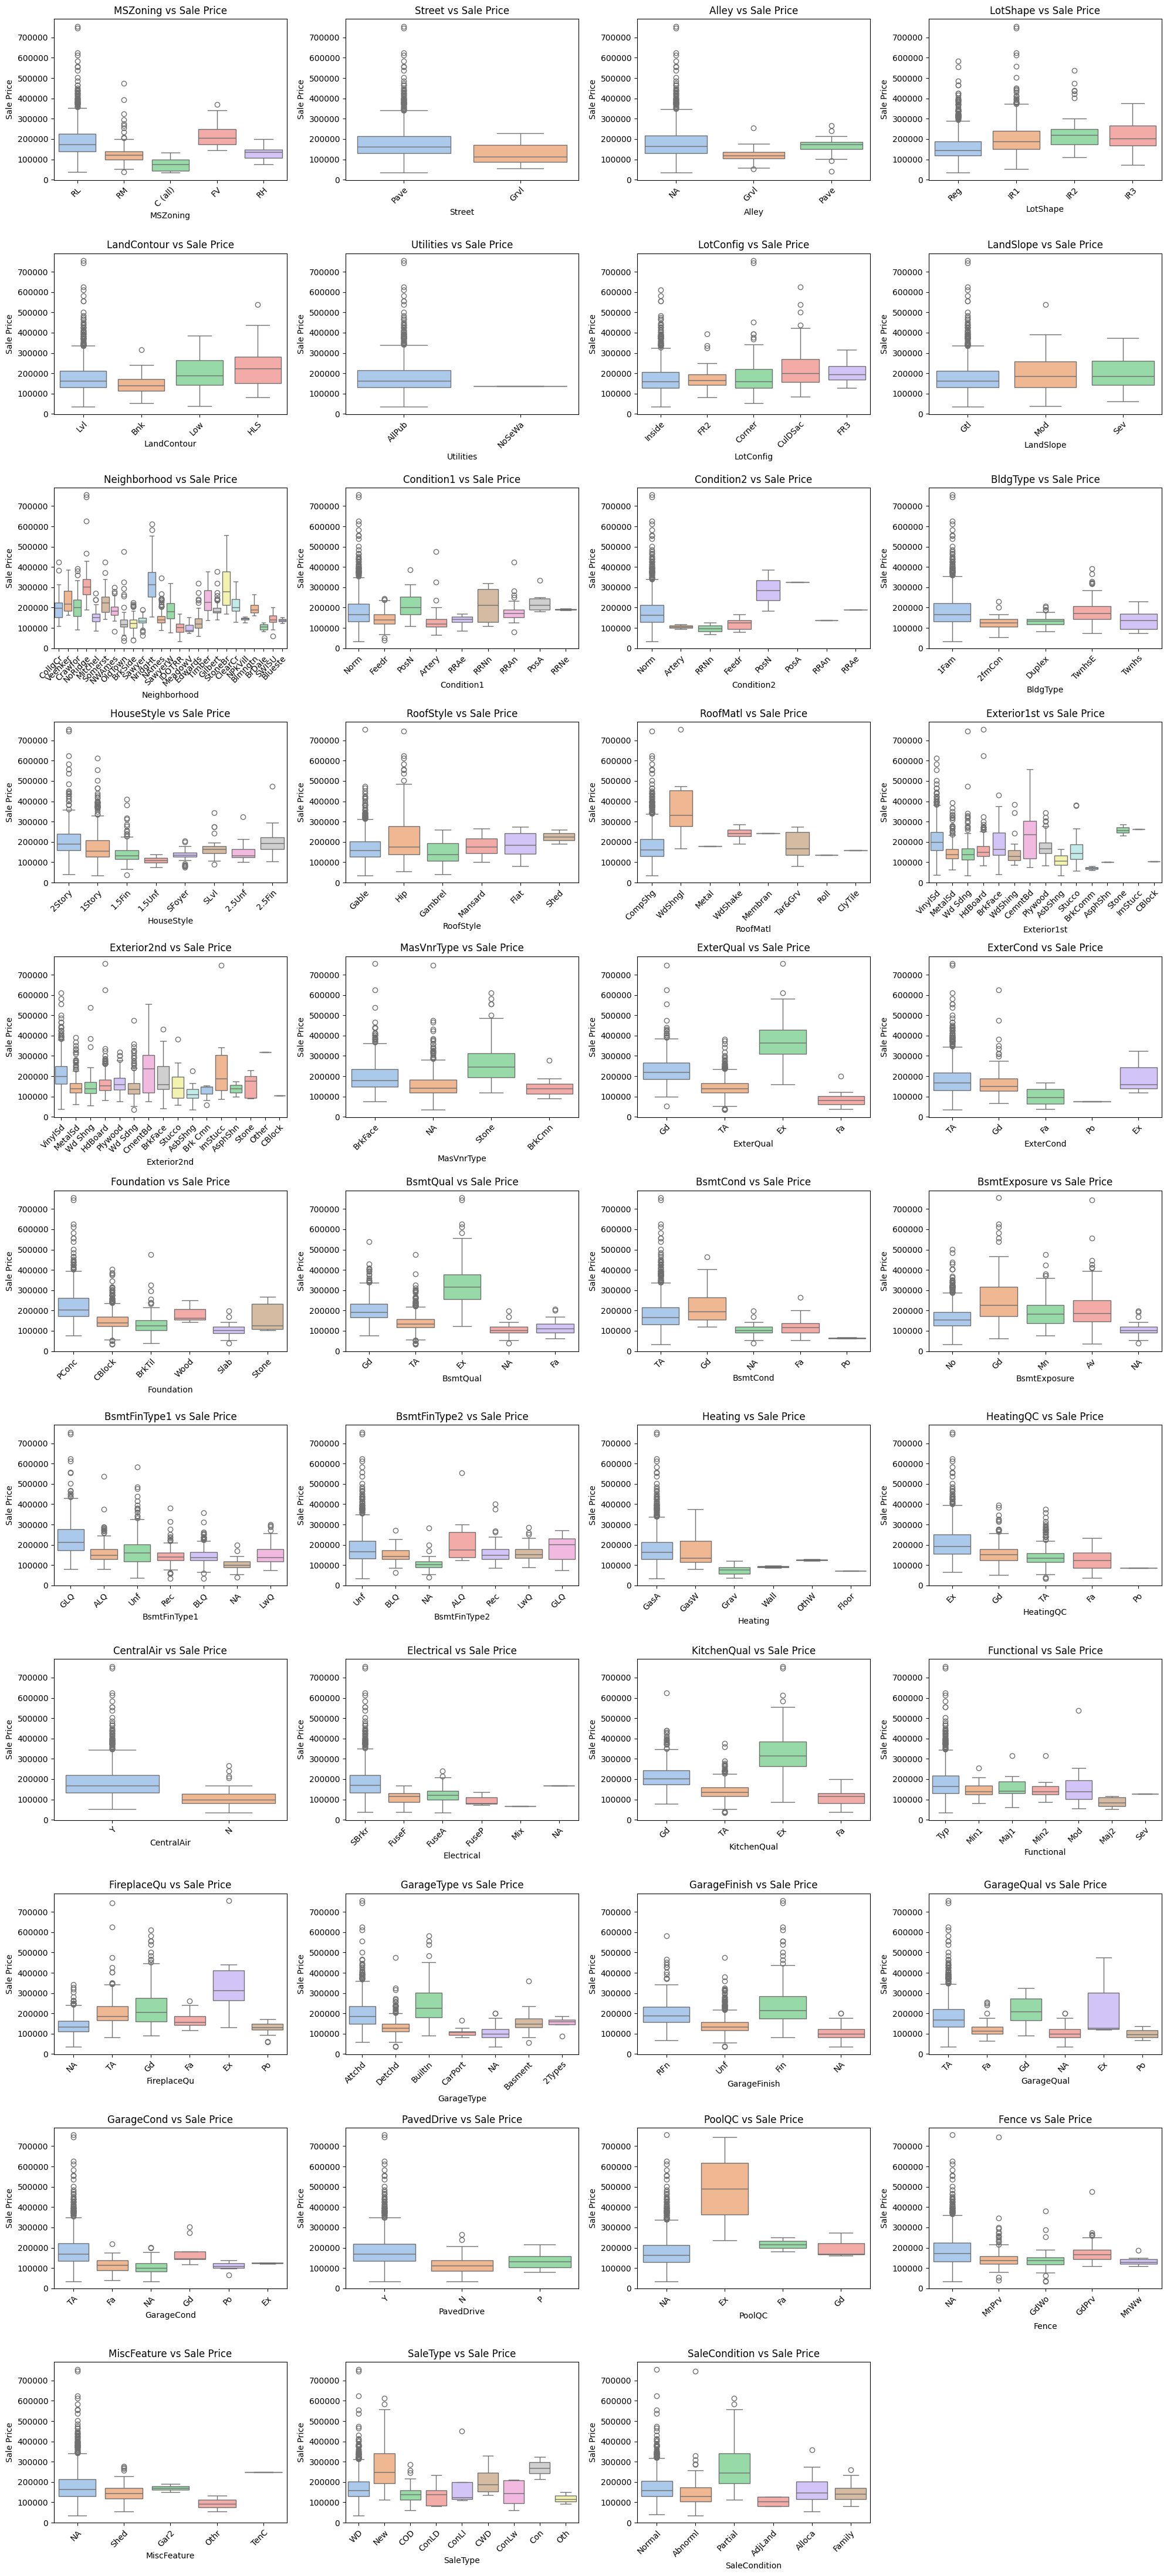

In [16]:
categorical_vs_target_plot(c_df, target)

## Feature Selection of Categorical Features

In [19]:
c_df = MutualInformationSelector(mi_threshold=0.1).fit_transform(c_df, target)

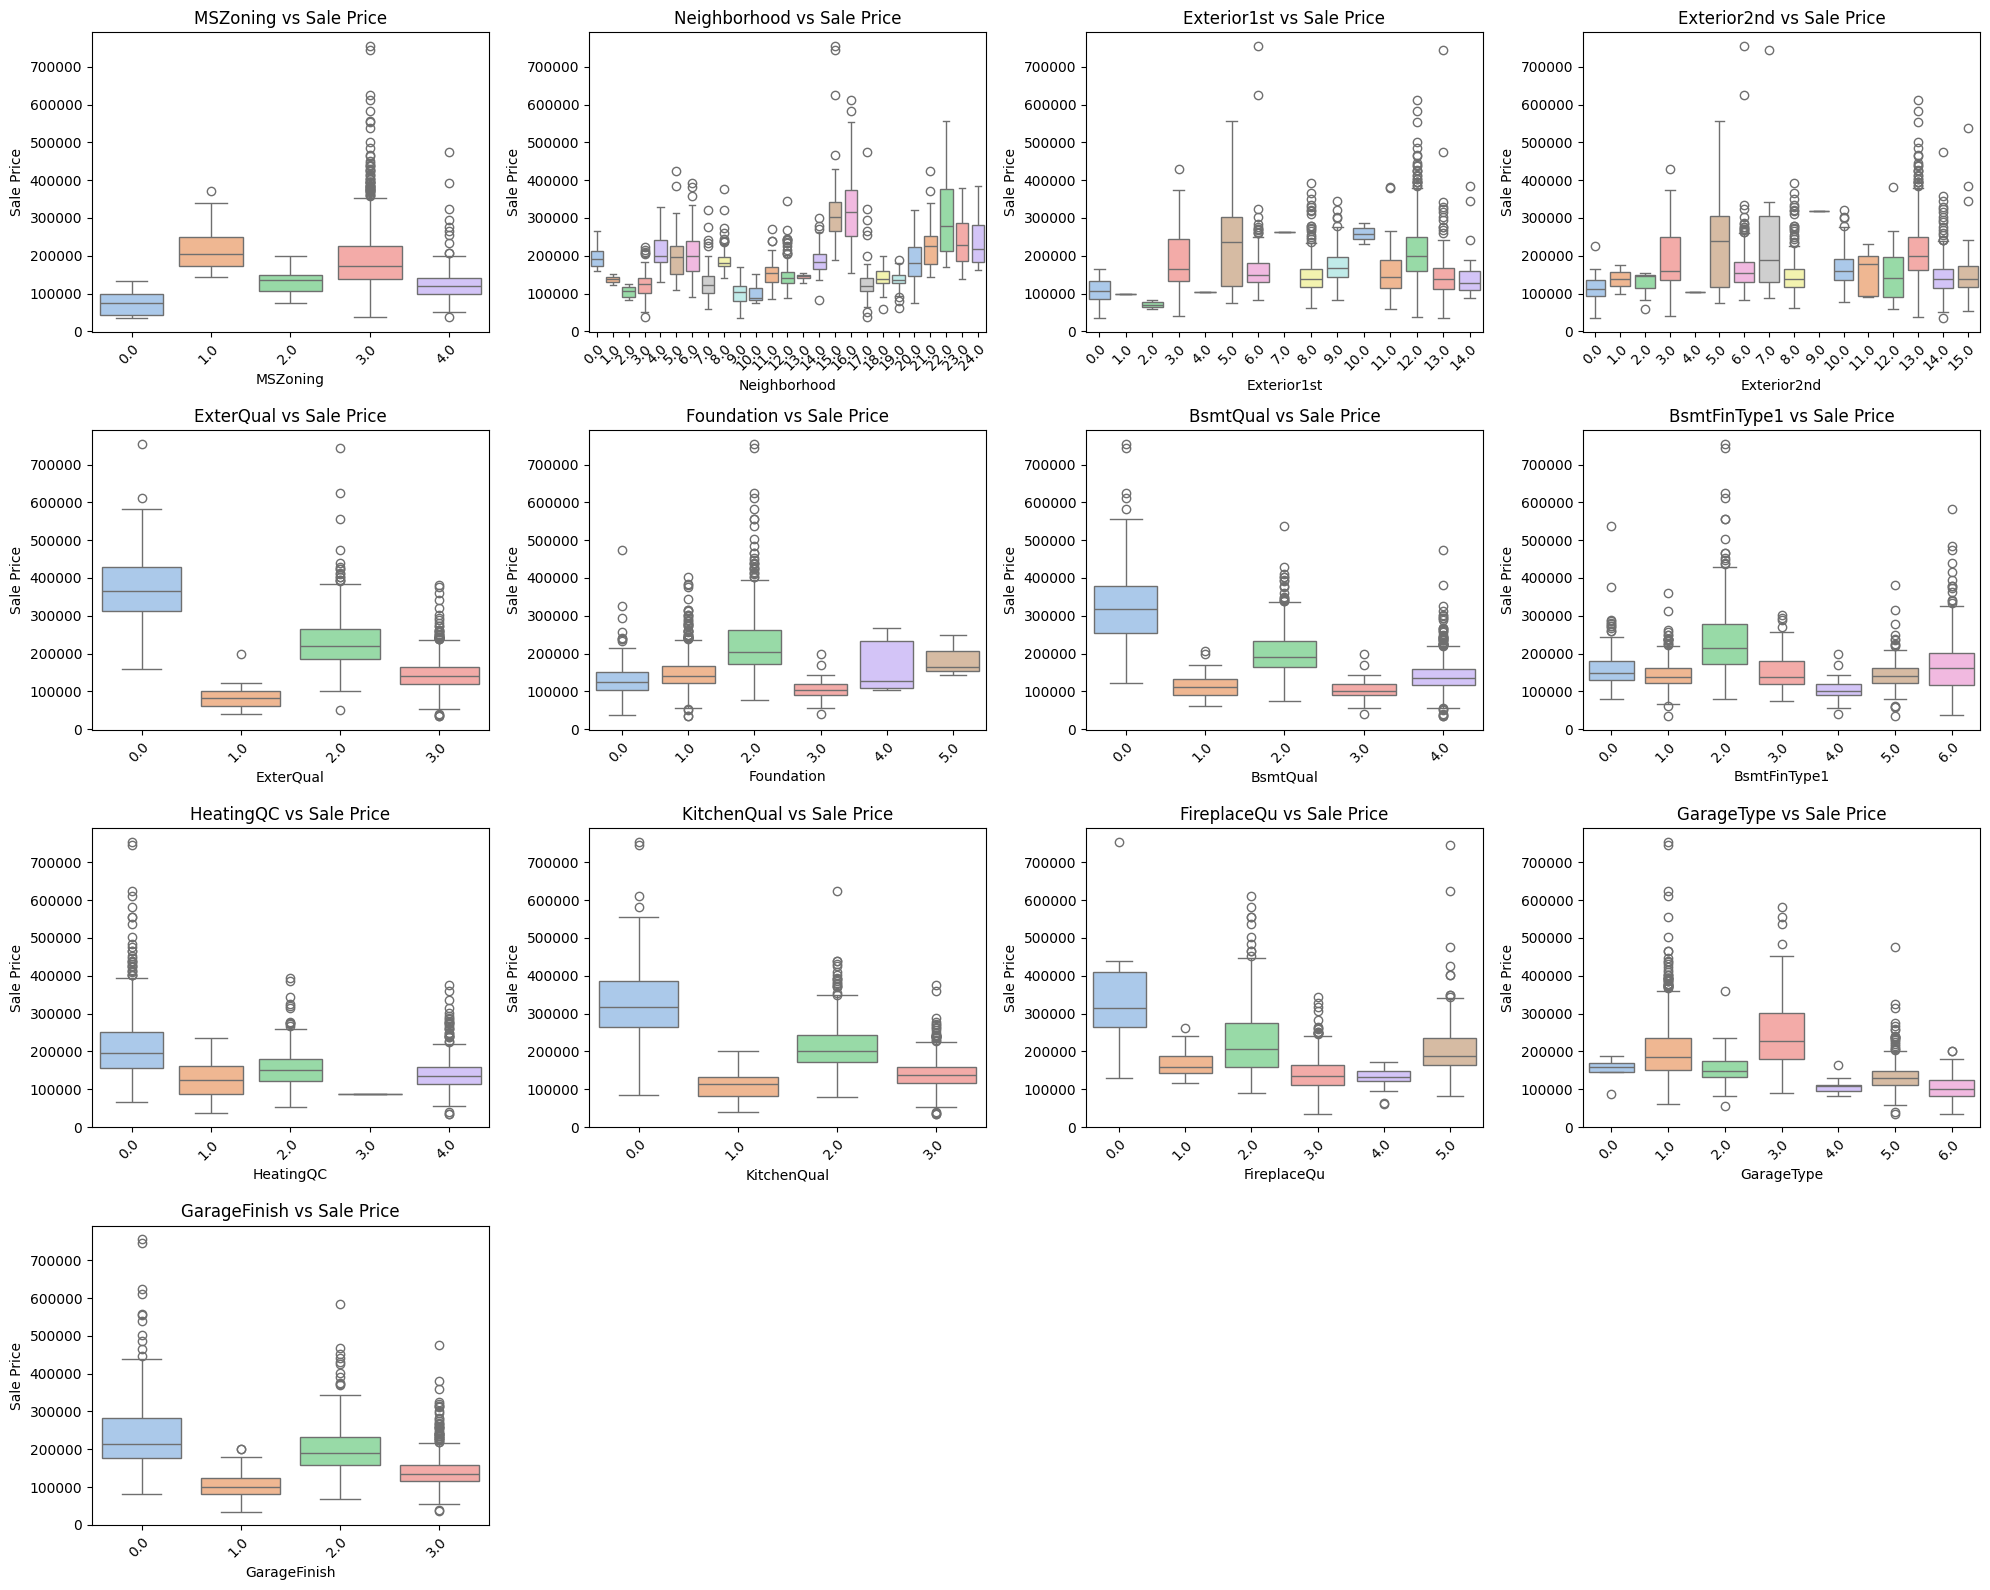

In [20]:
categorical_vs_target_plot(c_df, target)

## Target Variable Distribution Plot

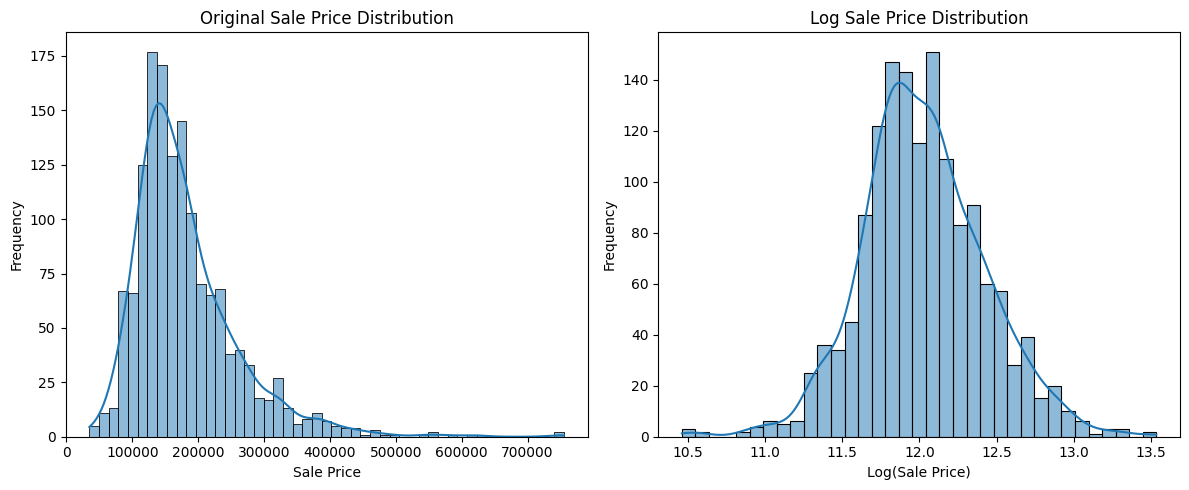

In [36]:
fig, axes = plt.subplots(1, 2,figsize=(12, 5))  # 1 row, 2 columns

# First plot
plot_target_distribution(
    target.to_numpy(),
    "Original Sale Price Distribution",
    xlabel="Sale Price",
    ylabel="Frequency",
    ax=axes[0]
)


# Second plot
plot_target_distribution(
    log_transform(target),
    "Log Sale Price Distribution",
    xlabel="Log(Sale Price)",
    ylabel="Frequency",
    ax=axes[1]
)

plt.tight_layout()
plt.show()